# Getting a Basic Idea of the Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data set
df = pd.read_csv('./Grade_CS_Students.csv')


In [3]:
# Display the first few rows of the DataFrame
print(df.head())

# Get basic statistics of the data
print(df.describe())

# Get information about the data types and non-null counts
print(df.info())


  Year of enrolment   ID  CS101  CS102  MA101  MA112  MA121  GS101  GS102  \
0         2005-2008  ST1     40     51     40    NaN     40     44     57   
1               NaN  ST2     40     40     46    NaN     40     48     45   
2               NaN  ST3     53     77     45    NaN     40     48     50   
3               NaN  ST4     40     41     40    NaN     40     40     44   
4               NaN  ST5     51     52     50    NaN     40     67     54   

   PH101  ...  CS507  CS508  CS509  CS510  CS512  CS597  CS598  MA419  SW499  \
0     40  ...     50   42.0   67.0   46.0   43.0   63.0   70.0   58.0   63.0   
1     40  ...     41   40.0   49.0   40.0   40.0   60.0   70.0   69.0   70.0   
2     40  ...     54   41.0   67.0   41.0   40.0   62.0   76.0   63.0   66.0   
3     40  ...     44   56.0   55.0   40.0   40.0   66.0   64.0   46.0   66.0   
4     40  ...     52   40.0   40.0   64.0   43.0   60.0   71.0   51.0   66.0   

   MM507  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4

In [4]:
# clean the data (NA values)
df.replace('NA', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')


C:\Users\Kalindu Denuwan\AppData\Local\Temp\ipykernel_16096\1036669491.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


## Distribution of Marks for a Selected Course:

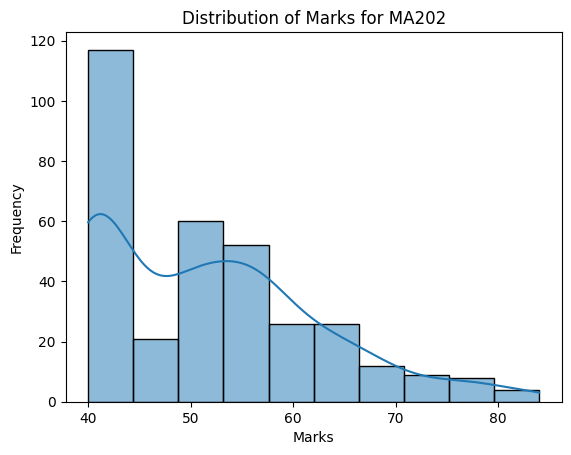

In [5]:
# check ditribution of an individual course
course = 'MA202'

sns.histplot(df[course], kde=True)
plt.title(f'Distribution of Marks for {course}')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()


## Box Plot of Marks for All Courses:

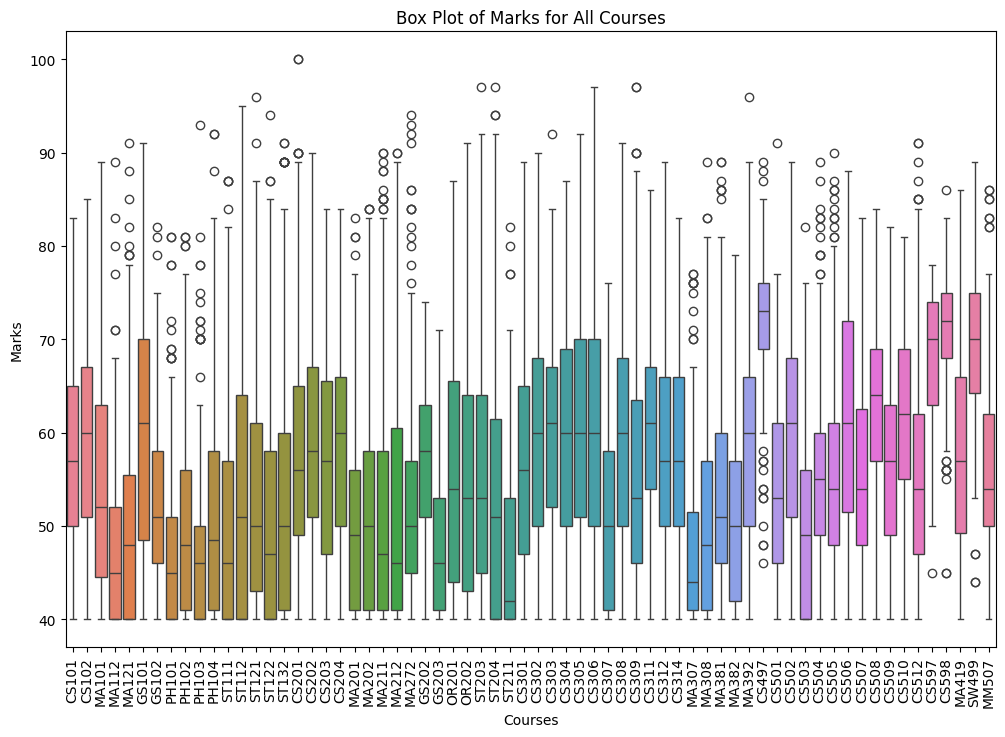

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['Year of enrolment', 'ID']))
plt.title('Box Plot of Marks for All Courses')
plt.xlabel('Courses')
plt.ylabel('Marks')
plt.xticks(rotation=90)
plt.show()


## Year-wise Box Plots 

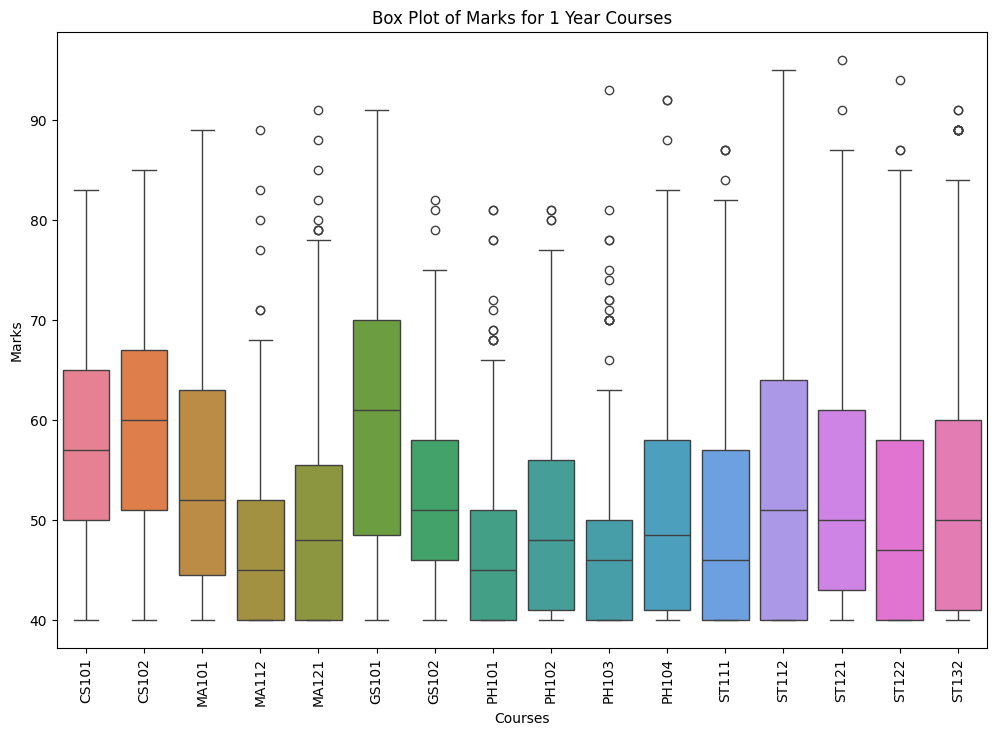

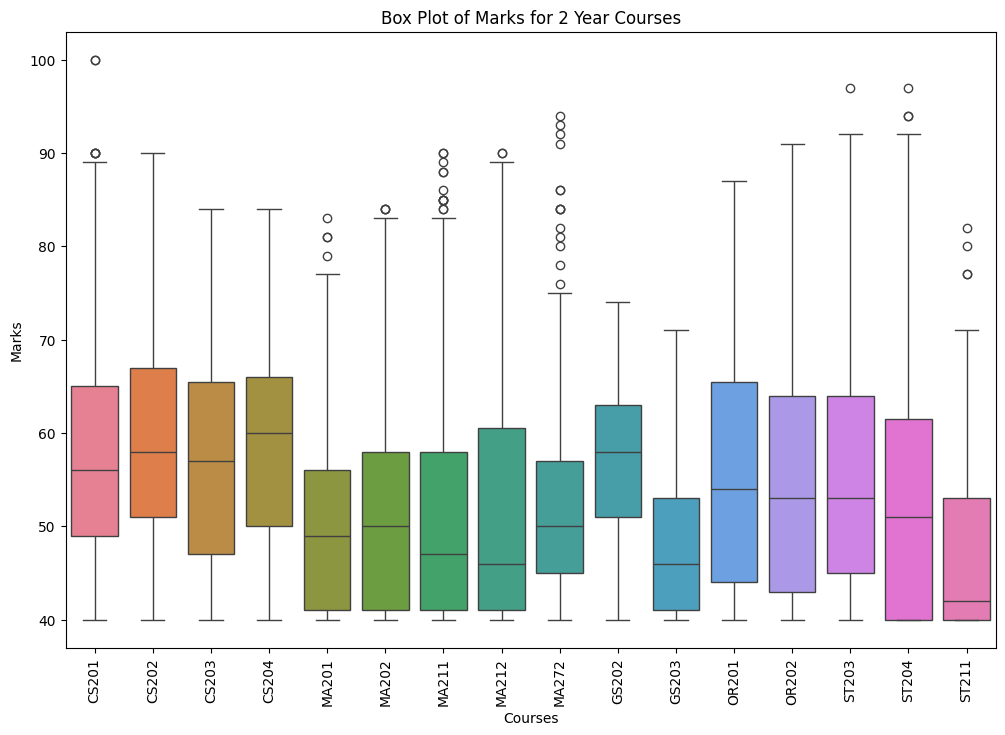

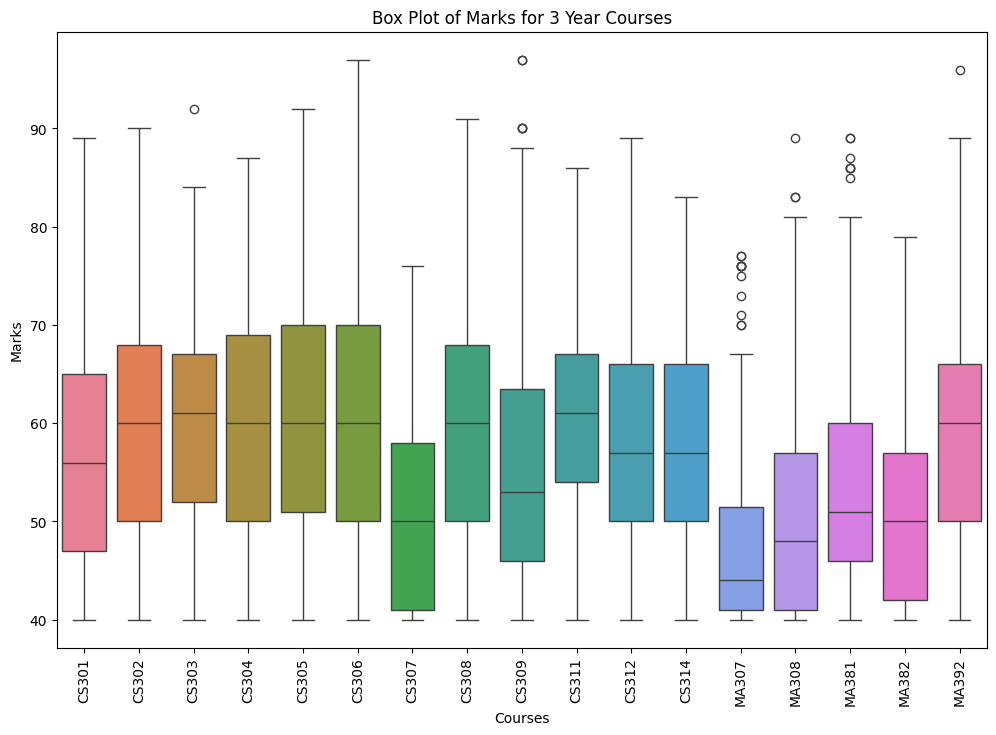

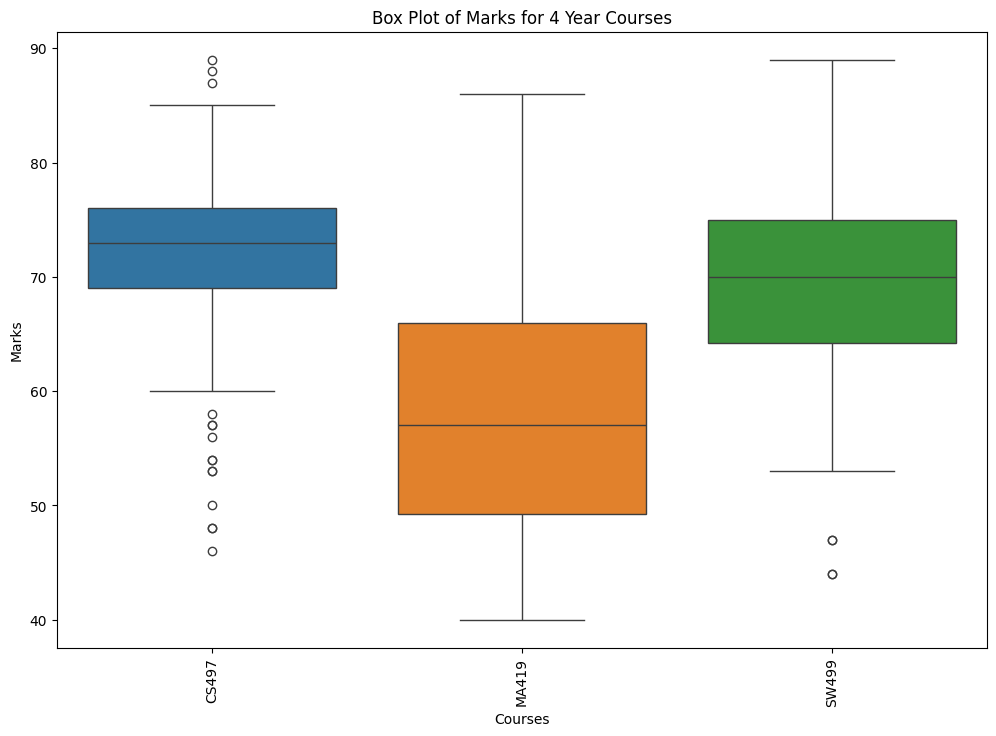

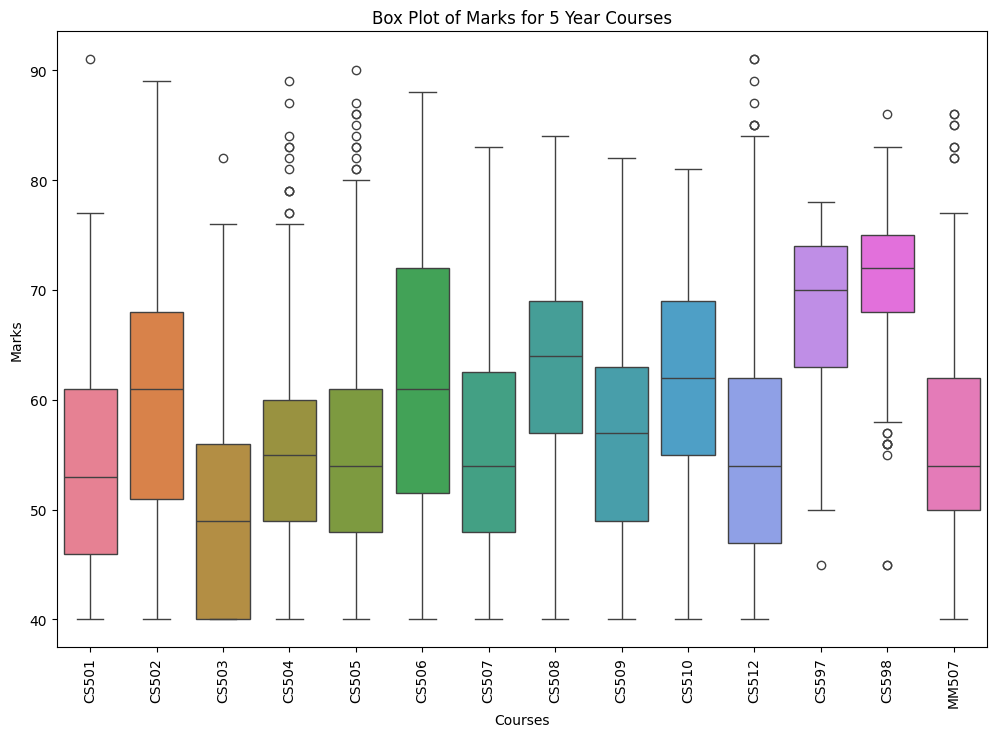

In [7]:
# Extract year from course codes
def get_course_year(course):
    if isinstance(course, str):
        return int(course[2])
    return None

# Create a list of course columns
course_columns = df.columns[2:]

# Create a dictionary to hold DataFrames for each year
yearly_dfs = {i: pd.DataFrame() for i in range(1, 6)}

# Iterate over course columns and assign them to the appropriate year
for col in course_columns:
    year = get_course_year(col)
    if year in yearly_dfs:
        yearly_dfs[year][col] = df[col]

# Plot box plots for each year
for year, year_df in yearly_dfs.items():
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=year_df)
    plt.title(f'Box Plot of Marks for {year} Year Courses')
    plt.xlabel('Courses')
    plt.ylabel('Marks')
    plt.xticks(rotation=90)
    plt.show()

## Correlation Matrix Overall

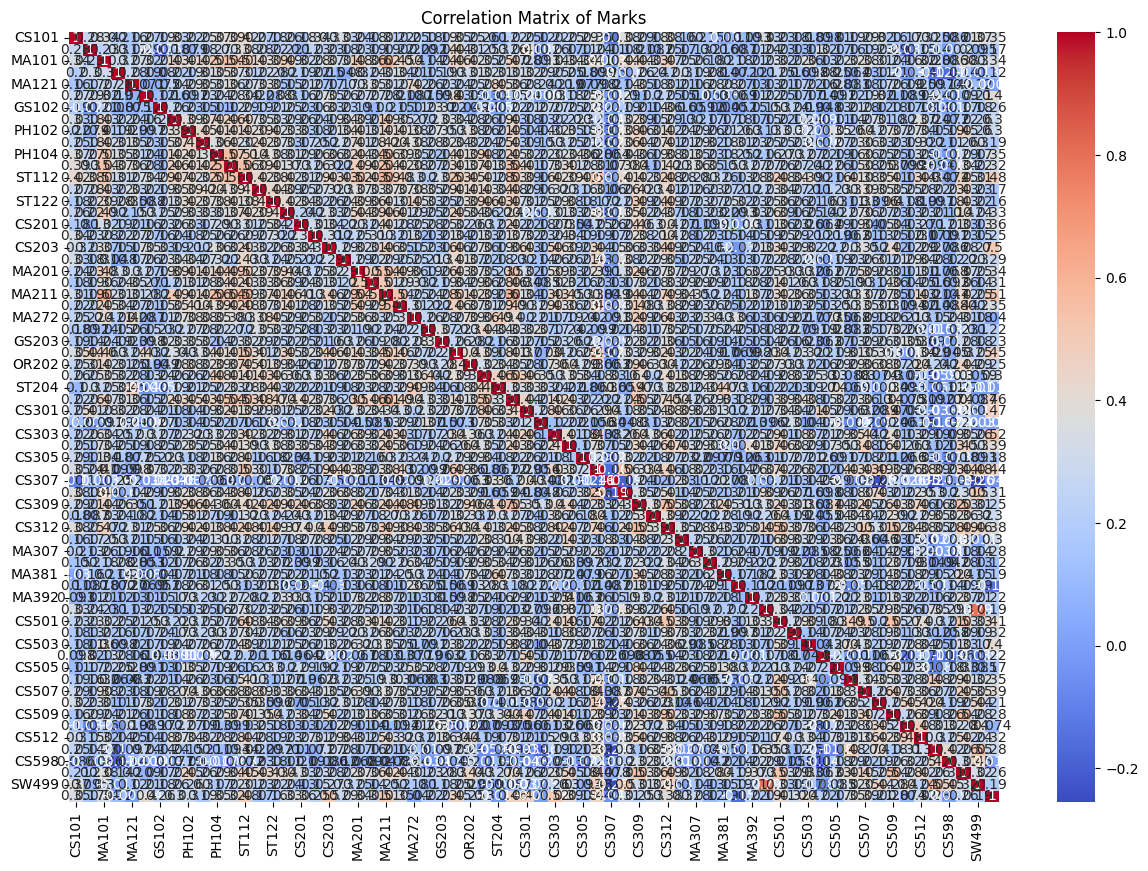

In [8]:
# Drop the first two columns ('Year of enrolment' and 'ID')
df_corr = df.drop(columns=['Year of enrolment', 'ID'])

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Marks')
plt.show()

## Year-wise Correlation Matrices w.r.t 5th year

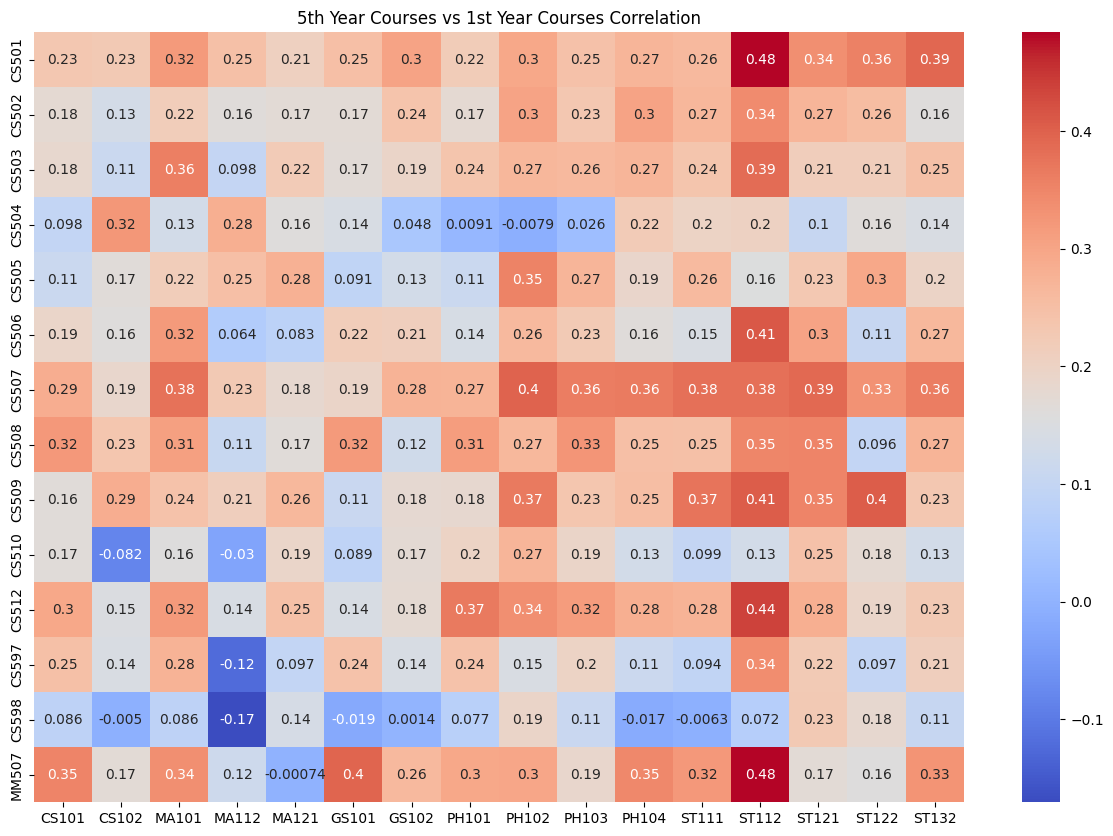

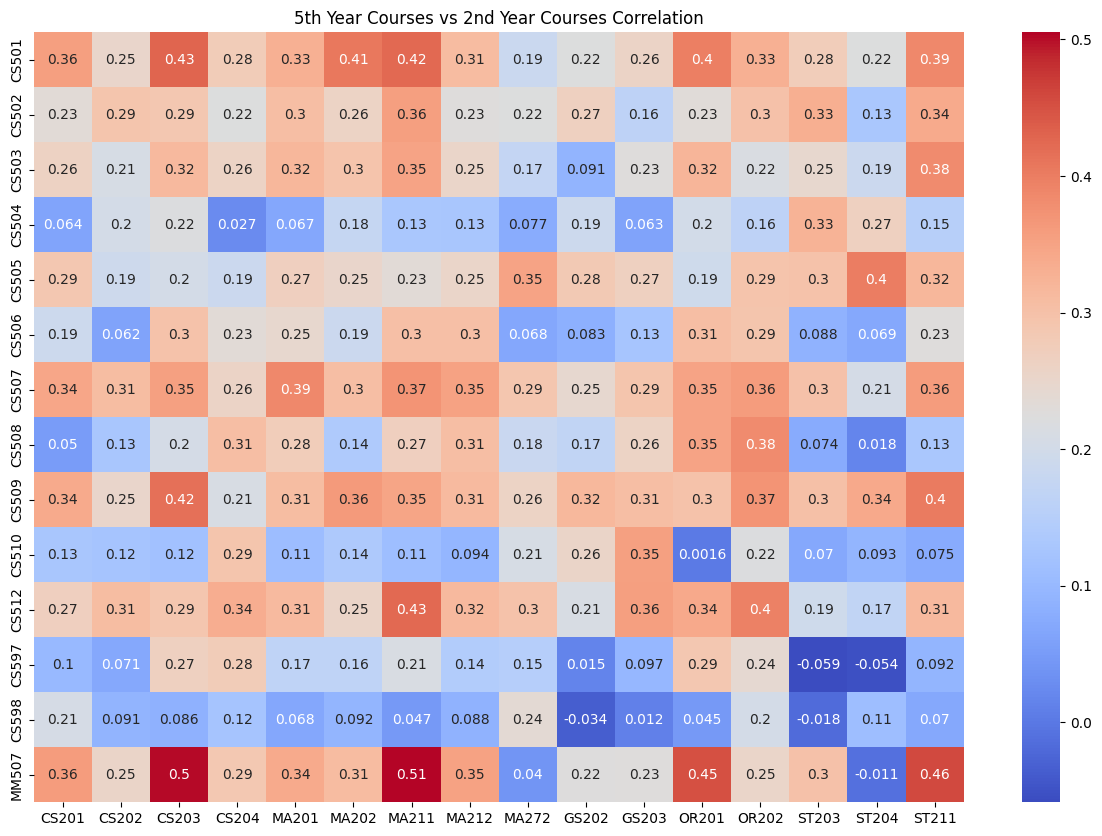

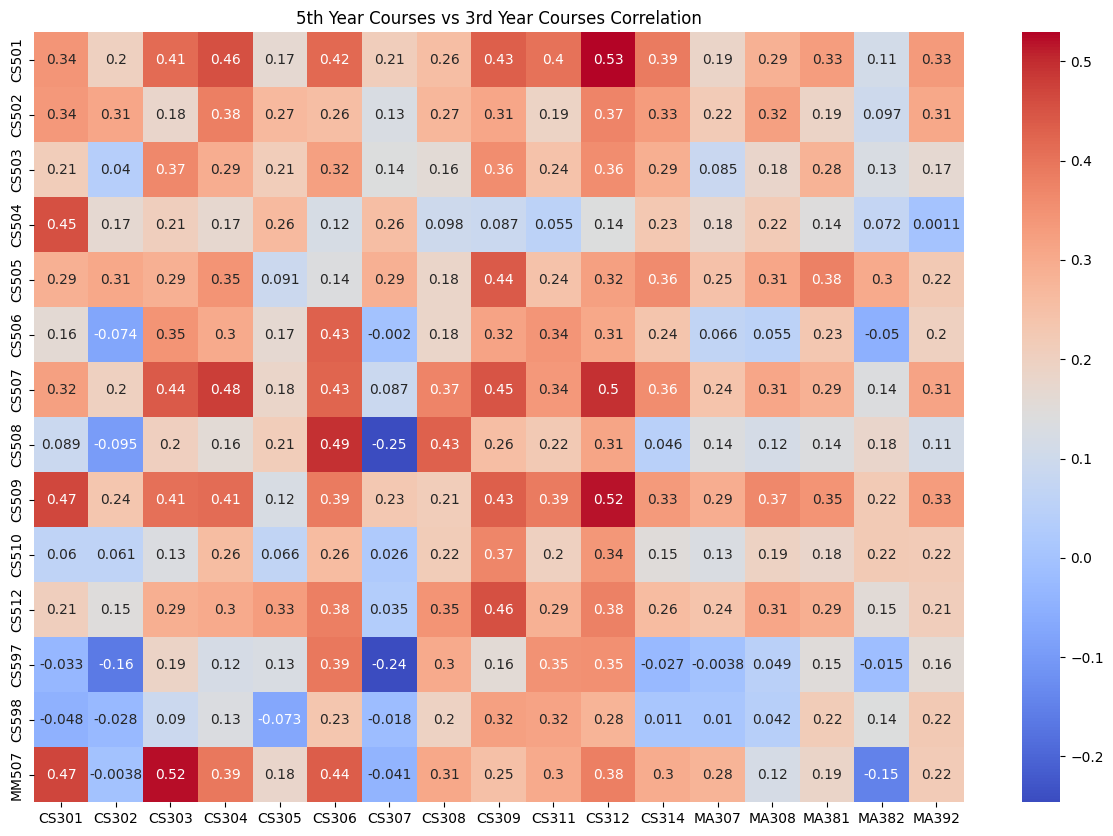

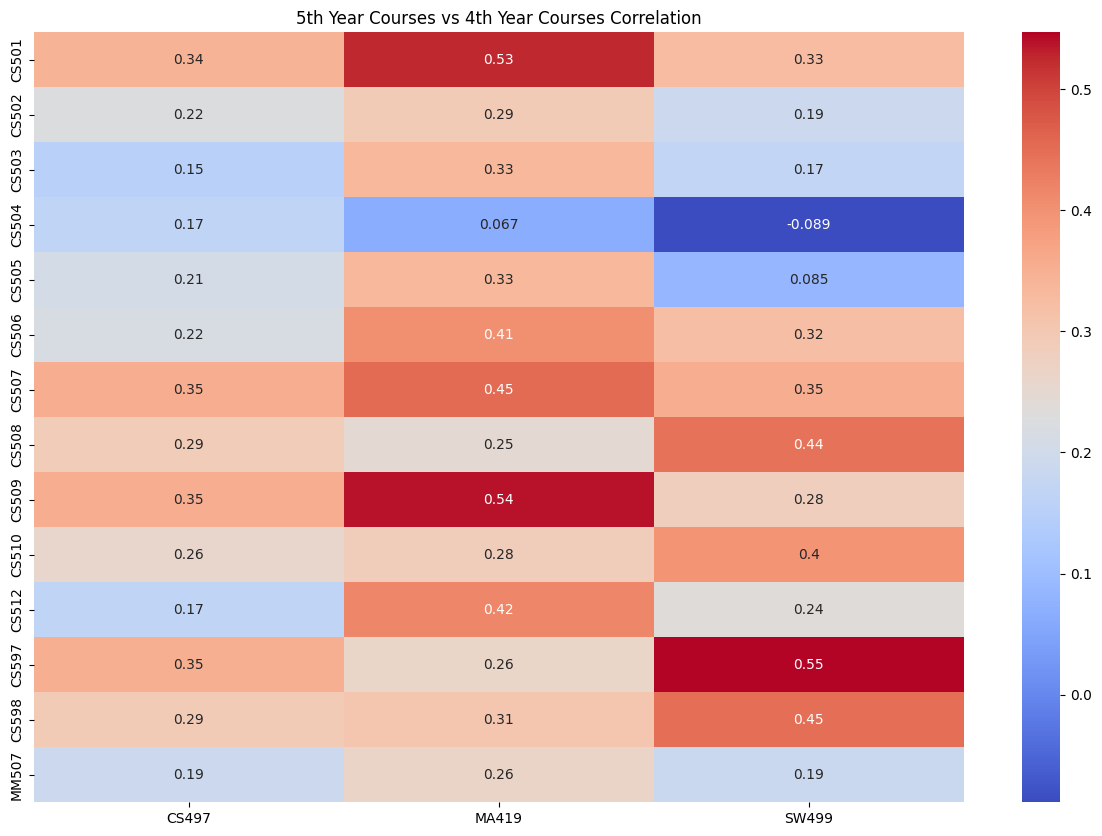

In [9]:
# Drop the first two columns ('Year of enrolment' and 'ID')
df_courses = df.drop(columns=['Year of enrolment', 'ID'])


# Create a list of course columns
course_columns = df_courses.columns

# Separate courses by year
courses_by_year = {i: [] for i in range(1, 6)}

for col in course_columns:
    year = get_course_year(col)
    if year in courses_by_year:
        courses_by_year[year].append(col)

# Function to plot correlation matrix with specific rows and columns
def plot_correlation_matrix(rows, cols, title):
    corr_matrix = df_courses[rows + cols].corr()
    sub_corr_matrix = corr_matrix.loc[rows, cols]
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(sub_corr_matrix, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

# 5th year courses w.r.t 1st year courses
fifth_year_courses = courses_by_year[5]
first_year_courses = courses_by_year[1]
plot_correlation_matrix(fifth_year_courses, first_year_courses, '5th Year Courses vs 1st Year Courses Correlation')

# 5th year courses w.r.t 2nd year courses
second_year_courses = courses_by_year[2]
plot_correlation_matrix(fifth_year_courses, second_year_courses, '5th Year Courses vs 2nd Year Courses Correlation')

# 5th year courses w.r.t 3rd year courses
third_year_courses = courses_by_year[3]
plot_correlation_matrix(fifth_year_courses, third_year_courses, '5th Year Courses vs 3rd Year Courses Correlation')

# 5th year courses w.r.t 4th year courses
fourth_year_courses = courses_by_year[4]
plot_correlation_matrix(fifth_year_courses, fourth_year_courses, '5th Year Courses vs 4th Year Courses Correlation')

## Trend of Marks throughout Years

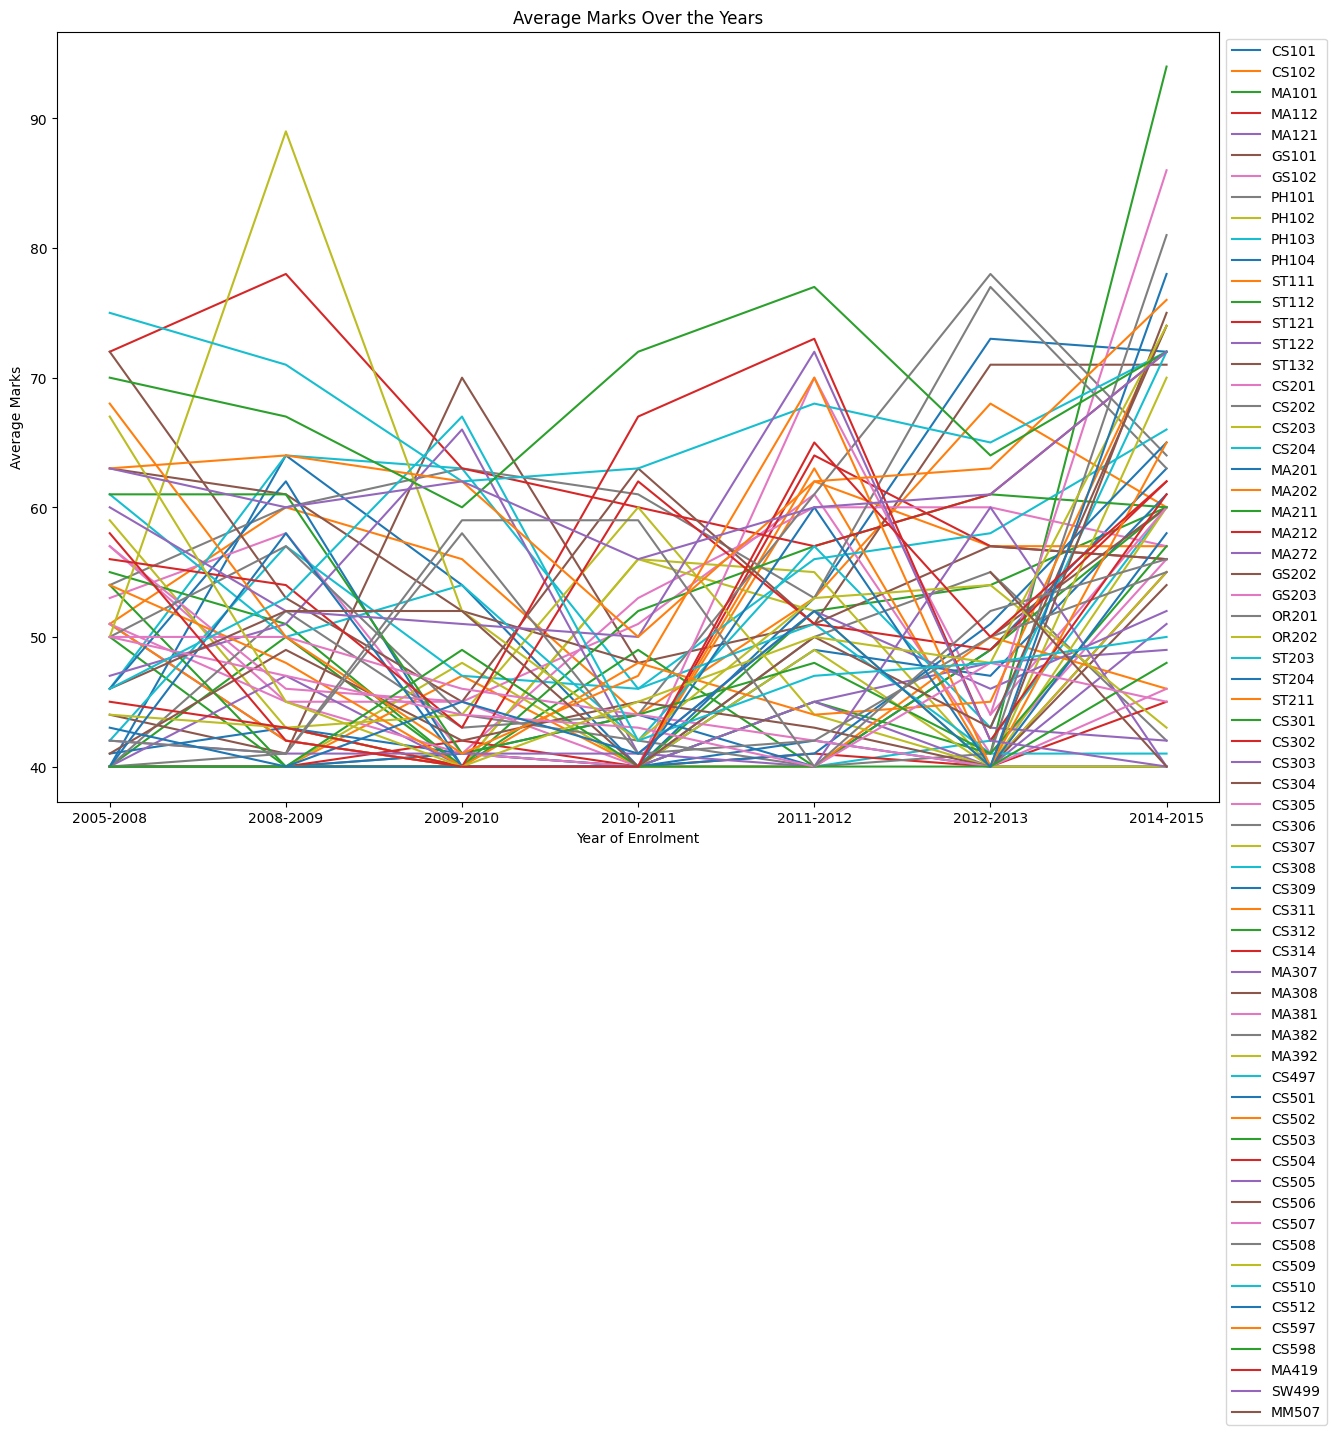

In [10]:
# Drop the first two columns ('Year of enrolment' and 'ID')
df_cleaned = df.drop(columns=['Year of enrolment', 'ID'])

# Group by 'Year of enrolment' and calculate the mean for each group
df_grouped = df.drop(columns=['ID']).groupby('Year of enrolment').mean()

# Plot the average marks over the years
df_grouped.plot(figsize=(15, 10))
plt.title('Average Marks Over the Years')
plt.xlabel('Year of Enrolment')
plt.ylabel('Average Marks')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

## Year-wise Trend of Course Makrs

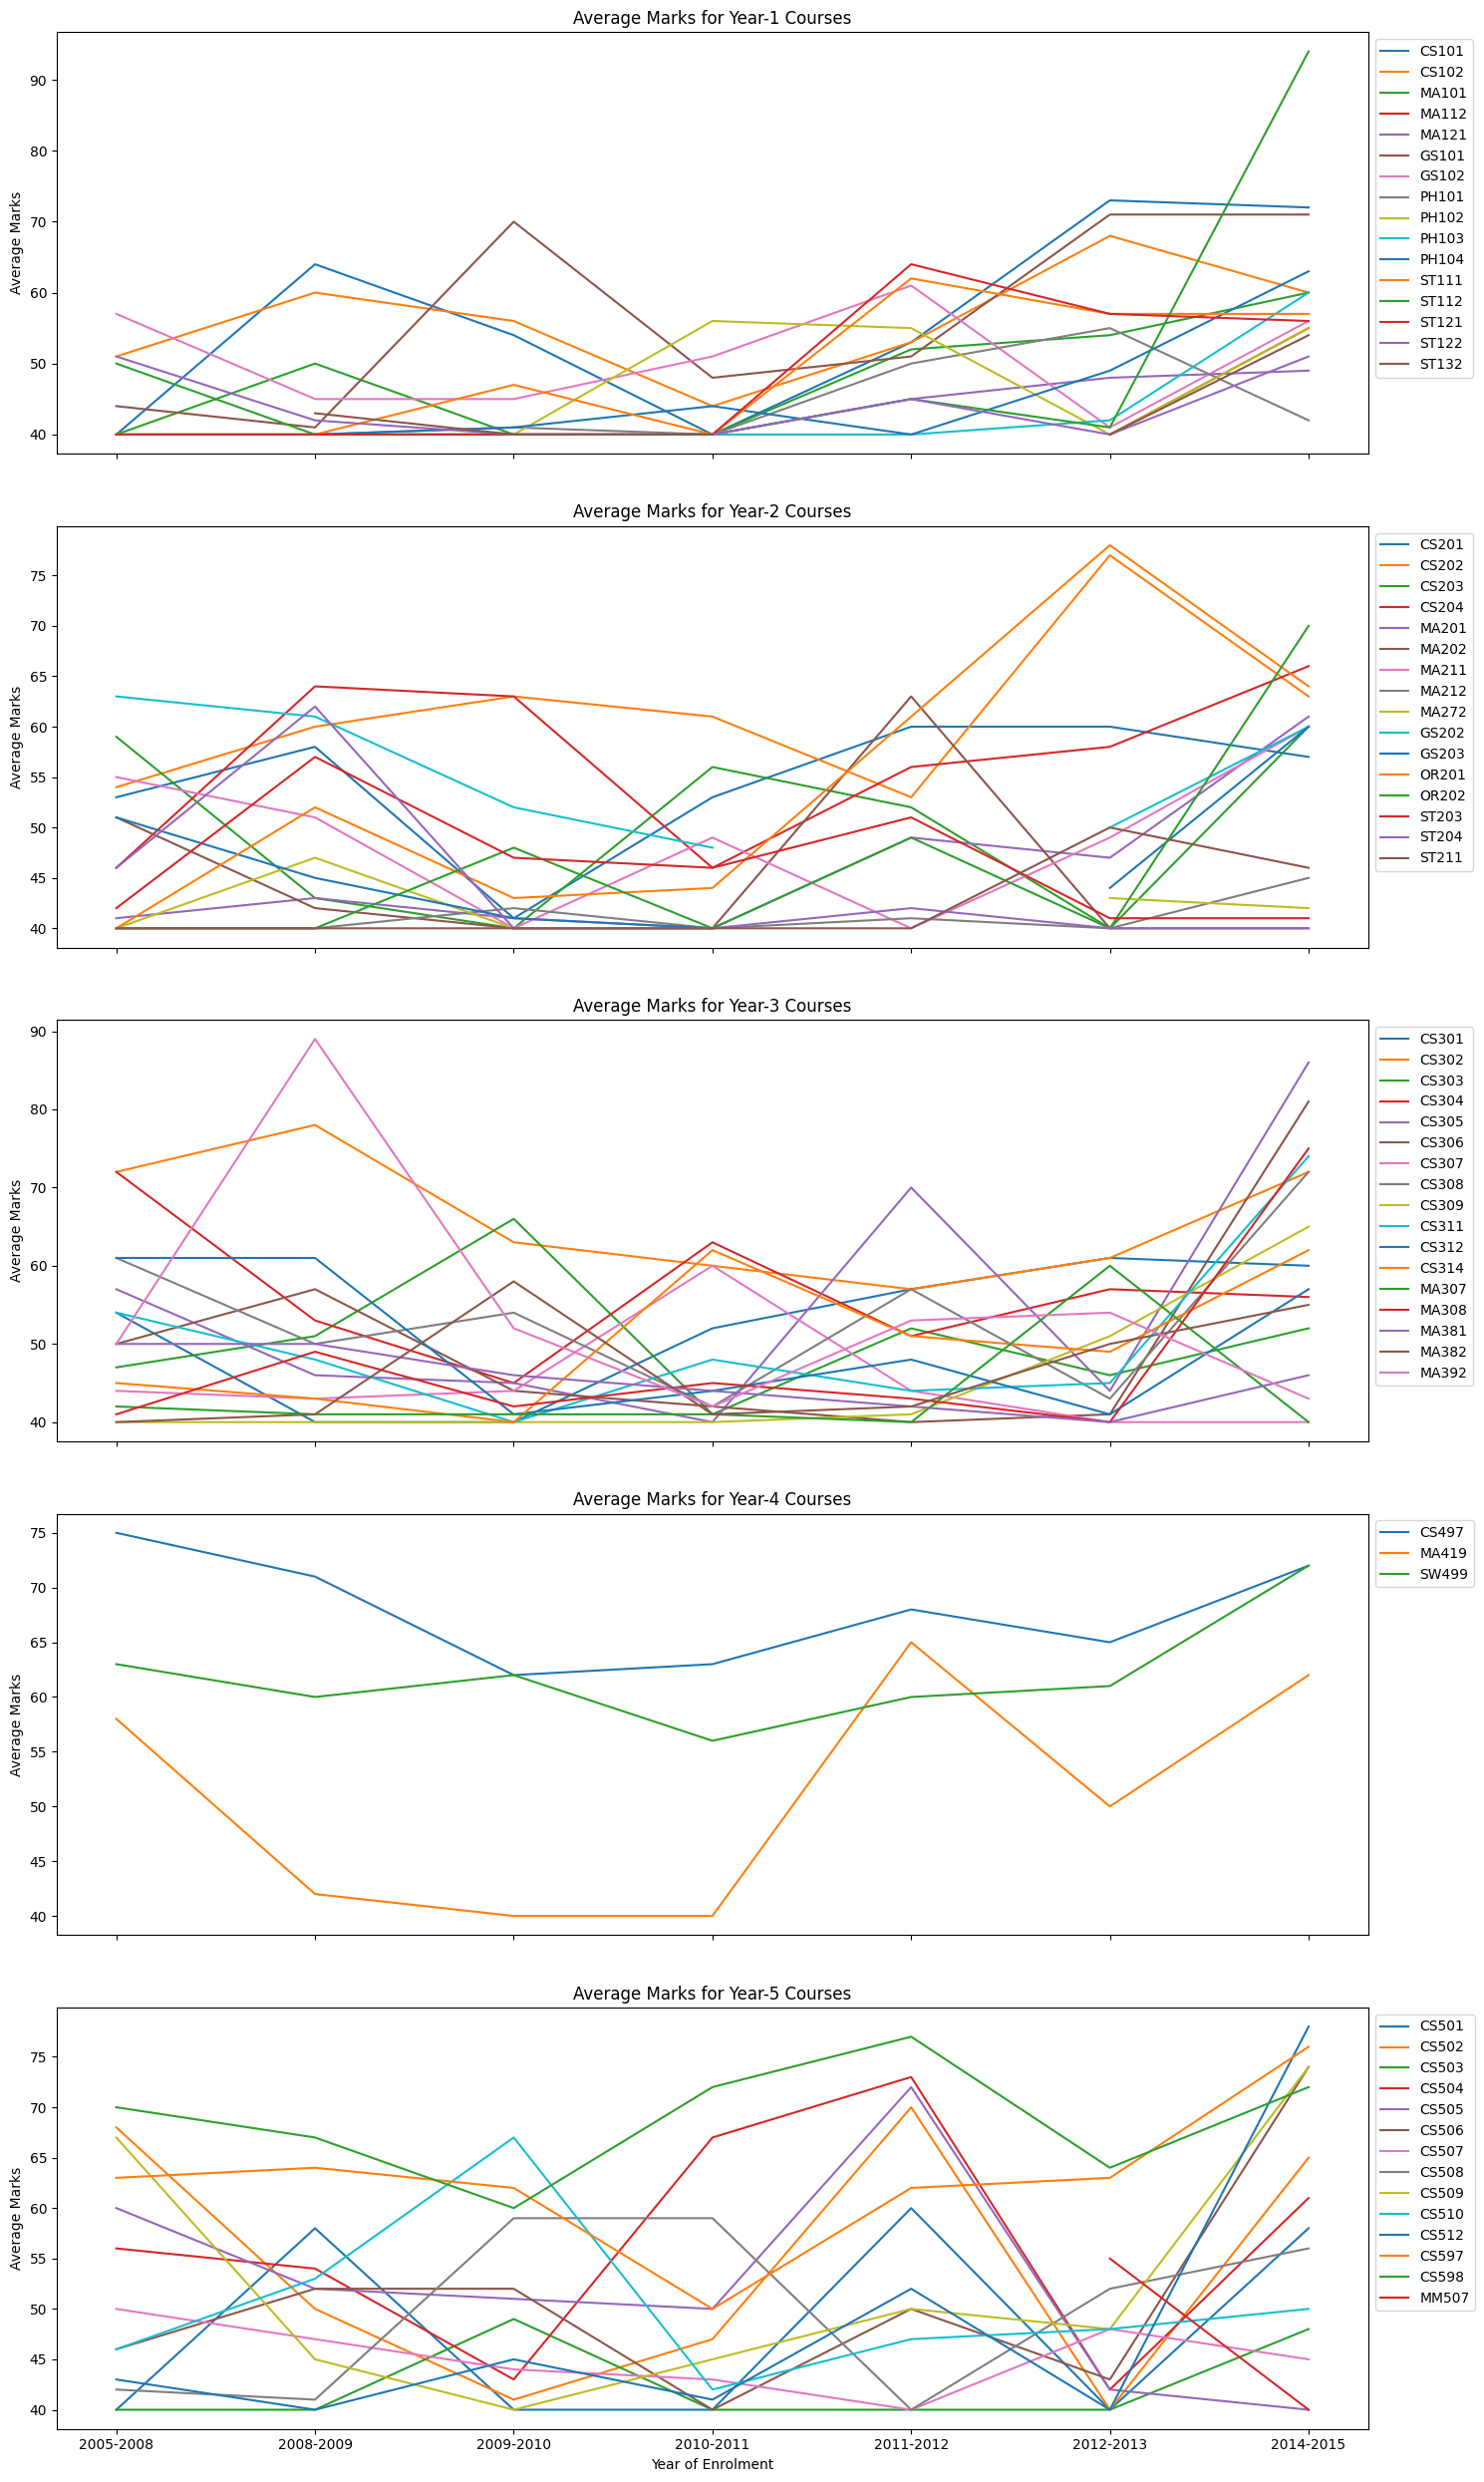

In [11]:
# Plot trends of the five years separately
fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharex=True)

for i in range(1, 6):
    if courses_by_year[i]:
        df_grouped[courses_by_year[i]].plot(ax=axes[i-1])
        axes[i-1].set_title(f'Average Marks for Year-{i} Courses')
        axes[i-1].set_xlabel('Year of Enrolment')
        axes[i-1].set_ylabel('Average Marks')
        axes[i-1].legend(loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Prediction Using Linear Regression

In [12]:
# print all the course codes

# Drop the first two columns ('Year of enrolment' and 'ID')
df_courses = df.drop(columns=['Year of enrolment', 'ID'])

# Create a list of course columns
course_columns = df_courses.columns

print(course_columns)

Index(['CS101', 'CS102', 'MA101', 'MA112', 'MA121', 'GS101', 'GS102', 'PH101',
       'PH102', 'PH103', 'PH104', 'ST111', 'ST112', 'ST121', 'ST122', 'ST132',
       'CS201', 'CS202', 'CS203', 'CS204', 'MA201', 'MA202', 'MA211', 'MA212',
       'MA272', 'GS202', 'GS203', 'OR201', 'OR202', 'ST203', 'ST204', 'ST211',
       'CS301', 'CS302', 'CS303', 'CS304', 'CS305', 'CS306', 'CS307', 'CS308',
       'CS309', 'CS311', 'CS312', 'CS314', 'MA307', 'MA308', 'MA381', 'MA382',
       'MA392', 'CS497', 'CS501', 'CS502', 'CS503', 'CS504', 'CS505', 'CS506',
       'CS507', 'CS508', 'CS509', 'CS510', 'CS512', 'CS597', 'CS598', 'MA419',
       'SW499', 'MM507'],
      dtype='object')


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Read the CSV file
df = pd.read_csv('Grade_CS_Students.csv')

# Replace 'NA' with NaN and convert columns to numeric where applicable
df.replace('NA', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

# Define features (marks from 1st to 4th year) and target variable (marks of 5th-year courses)
features = ['CS101', 'CS102', 'MA101', 'MA112', 'MA121', 'GS101', 'GS102', 'PH101',
       'PH102', 'PH103', 'PH104', 'ST111', 'ST112', 'ST121', 'ST122', 'ST132',
       'CS201', 'CS202', 'CS203', 'CS204', 'MA201', 'MA202', 'MA211', 'MA212',
       'MA272', 'GS202', 'GS203', 'OR201', 'OR202', 'ST203', 'ST204', 'ST211',
       'CS301', 'CS302', 'CS303', 'CS304', 'CS305', 'CS306', 'CS307', 'CS308',
       'CS309', 'CS311', 'CS312', 'CS314', 'MA307', 'MA308', 'MA381', 'MA382',
       'MA392', 'CS497', 'MA419', 'SW499']
target_courses = ['CS501', 'CS502', 'CS503', 'CS504', 'CS505', 'CS506', 'CS507', 'CS508', 'CS509', 'CS510', 'CS512']

# Split the dataset into features and target variable
X = df[features]
y = df[target_courses]

# Impute missing values using mean imputation for both features and target variable
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 78.8177234874834


C:\Users\Kalindu Denuwan\AppData\Local\Temp\ipykernel_16096\2547144422.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


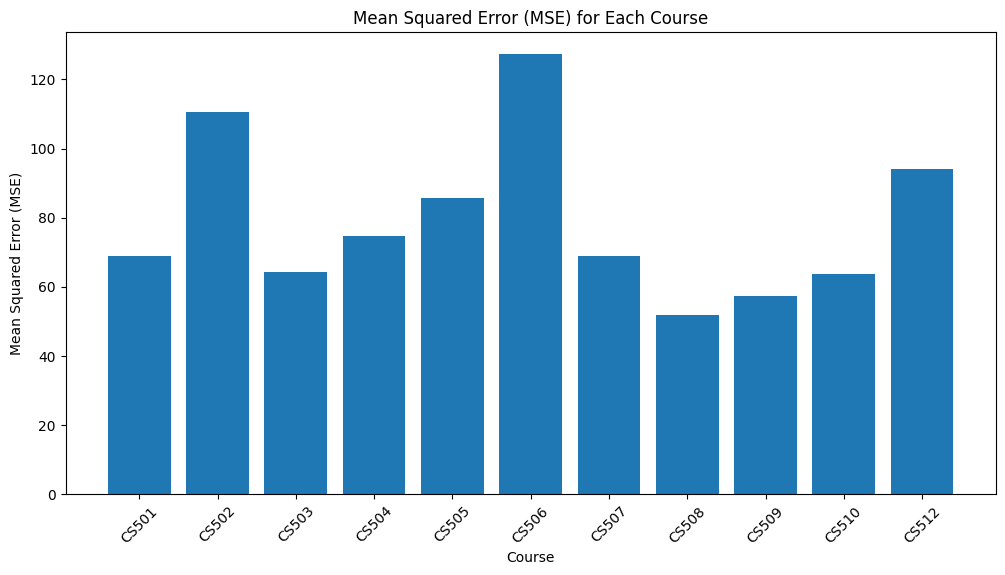

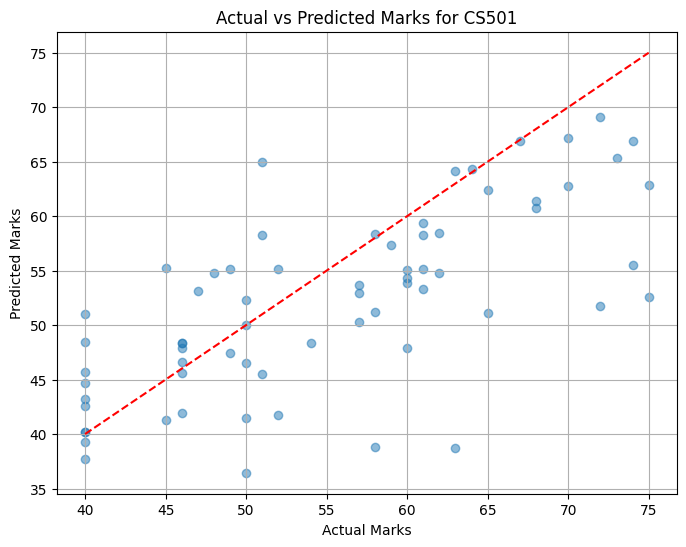

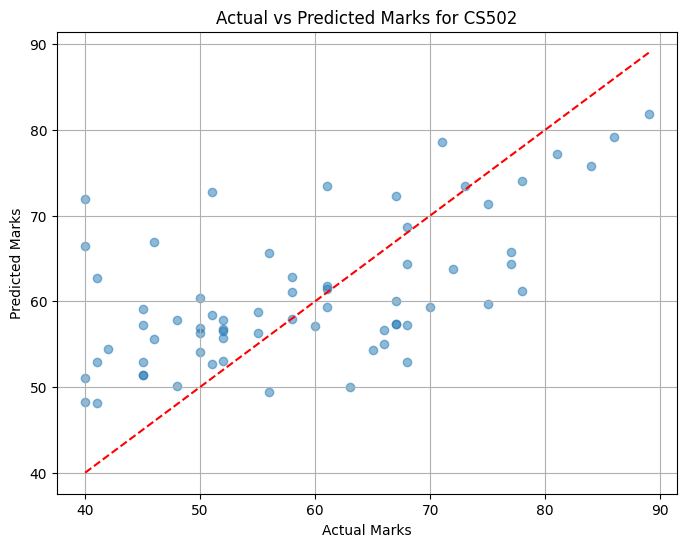

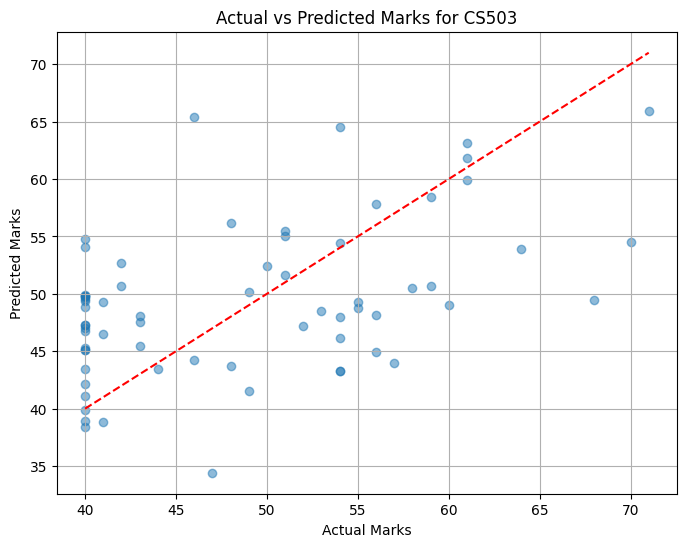

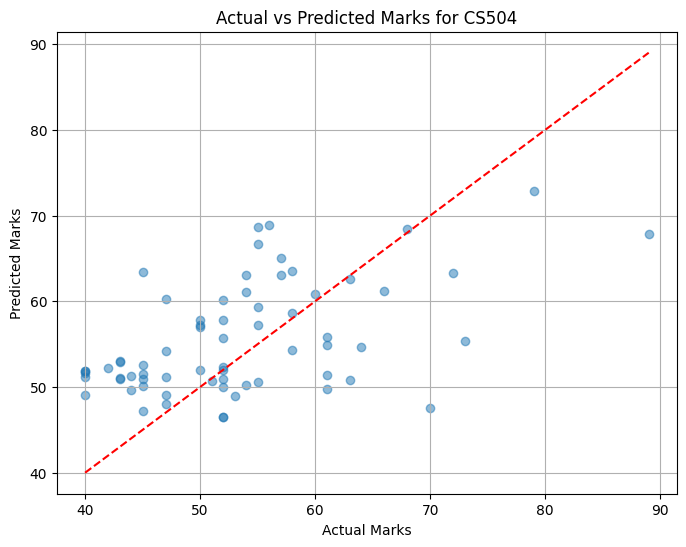

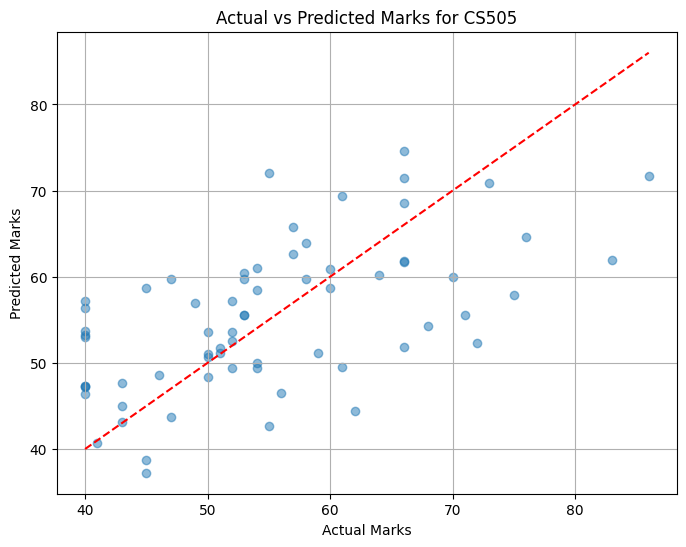

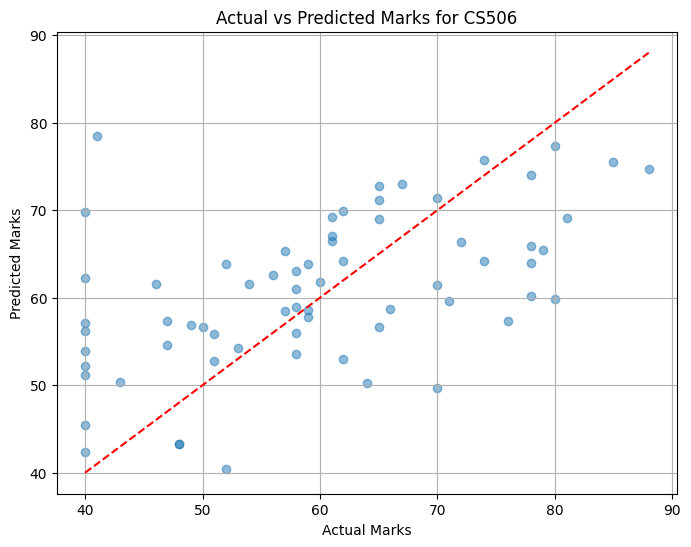

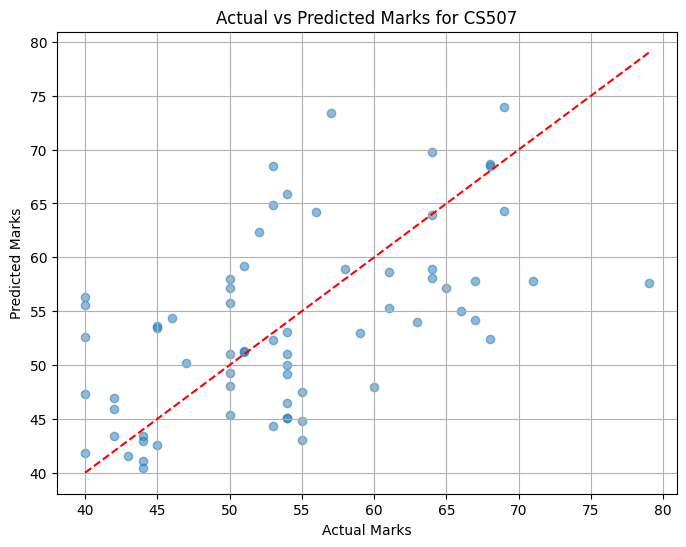

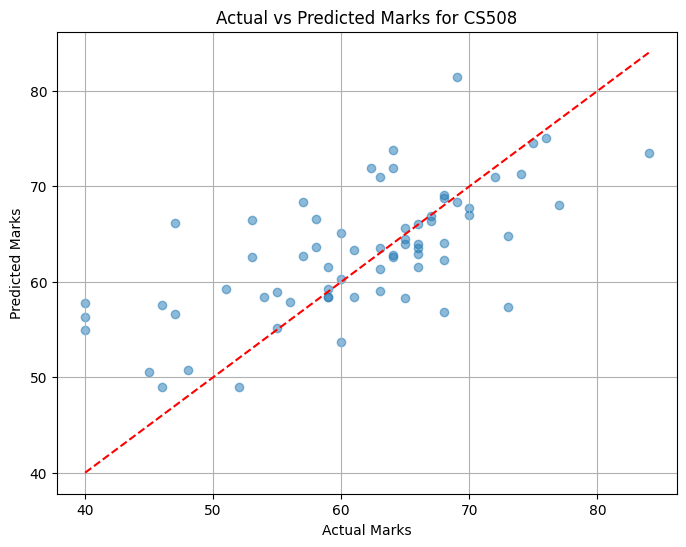

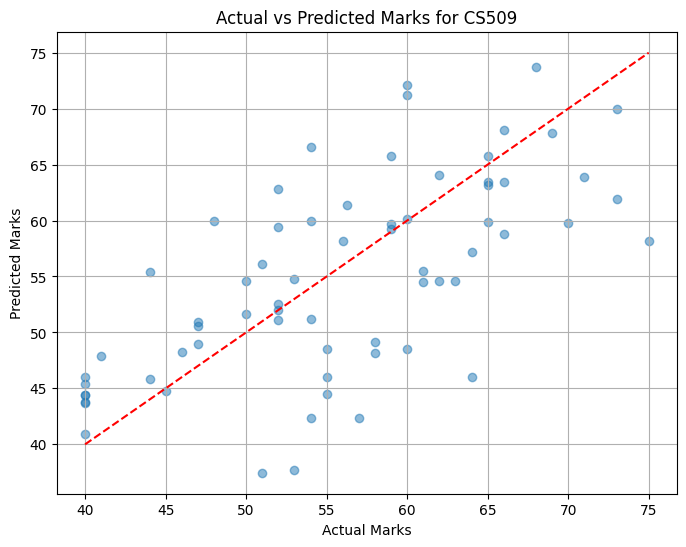

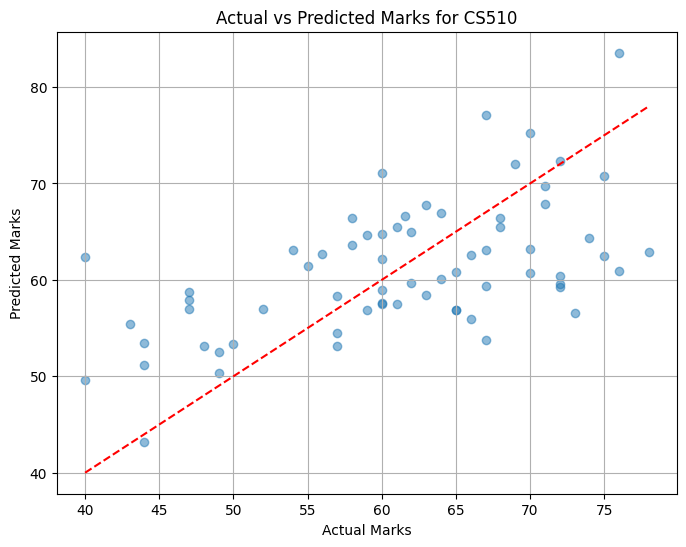

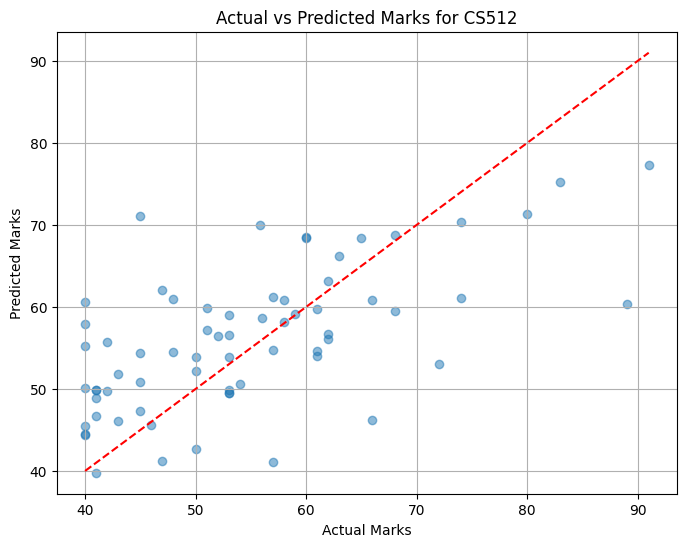

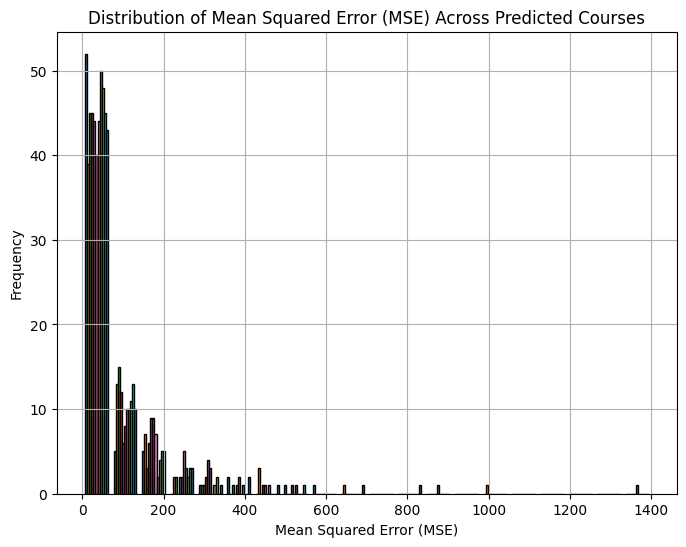

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean squared error (MSE) for each course
mse_per_course = np.mean((y_test - y_pred)**2, axis=0)

# Visualize MSE for each course
plt.figure(figsize=(12, 6))
plt.bar(target_courses, mse_per_course)
plt.title('Mean Squared Error (MSE) for Each Course')
plt.xlabel('Course')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()

# Visualize actual vs predicted marks for each course
for i, course in enumerate(target_courses):
    course_index = y.columns.get_loc(course)  # Get the index of the course within target_courses
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[:, course_index], y_pred[:, course_index], alpha=0.5)  # Use the index to access the column
    plt.plot([min(y_test[:, course_index]), max(y_test[:, course_index])], [min(y_test[:, course_index]), max(y_test[:, course_index])], color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Marks for {course}')
    plt.xlabel('Actual Marks')
    plt.ylabel('Predicted Marks')
    plt.grid(True)
    plt.show()


# Visualize distribution of MSE across all predicted courses
plt.figure(figsize=(8, 6))
plt.hist((y_test - y_pred)**2, bins=20, edgecolor='black')
plt.title('Distribution of Mean Squared Error (MSE) Across Predicted Courses')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

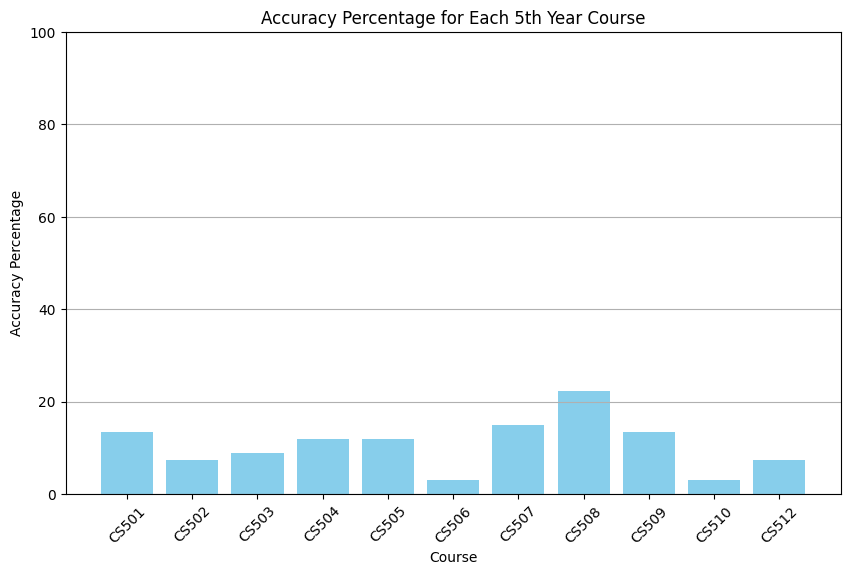

In [15]:
# Calculate accuracy percentage for each 5th year course
accuracy_per_course = []
for i, course in enumerate(target_courses):
    course_index = y.columns.get_loc(course)
    correct_predictions = np.sum(np.abs(y_test[:, course_index] - y_pred[:, course_index]) <= 1)  # Define threshold for correctness
    total_predictions = len(y_test)
    accuracy = (correct_predictions / total_predictions) * 100
    accuracy_per_course.append(accuracy)

# Visualize accuracy percentage for each 5th year course
plt.figure(figsize=(10, 6))
plt.bar(target_courses, accuracy_per_course, color='skyblue')
plt.title('Accuracy Percentage for Each 5th Year Course')
plt.xlabel('Course')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


# Radnom Forrest Regression 

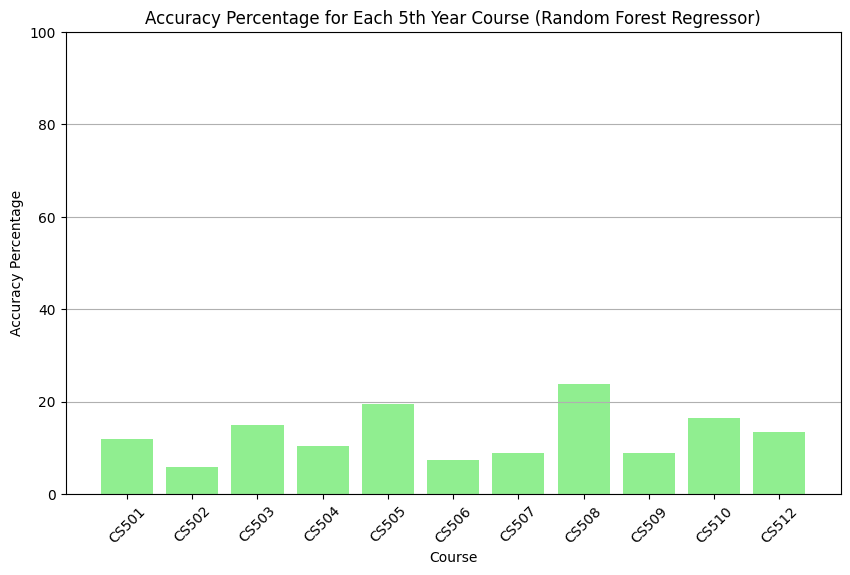

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=90)
model_rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = model_rf.predict(X_test)

# Calculate mean squared error (MSE) for each course
mse_per_course_rf = np.mean((y_test - y_pred_rf)**2, axis=0)

# Calculate accuracy percentage for each 5th year course
accuracy_per_course_rf = []
for i, course in enumerate(target_courses):
    course_index = y.columns.get_loc(course)
    correct_predictions_rf = np.sum(np.abs(y_test[:, course_index] - y_pred_rf[:, course_index]) <= 1)  # Define threshold for correctness
    total_predictions_rf = len(y_test)
    accuracy_rf = (correct_predictions_rf / total_predictions_rf) * 100
    accuracy_per_course_rf.append(accuracy_rf)

# Visualize accuracy percentage for each 5th year course using Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.bar(target_courses, accuracy_per_course_rf, color='lightgreen')
plt.title('Accuracy Percentage for Each 5th Year Course (Random Forest Regressor)')
plt.xlabel('Course')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


# Gradient Boost Regression

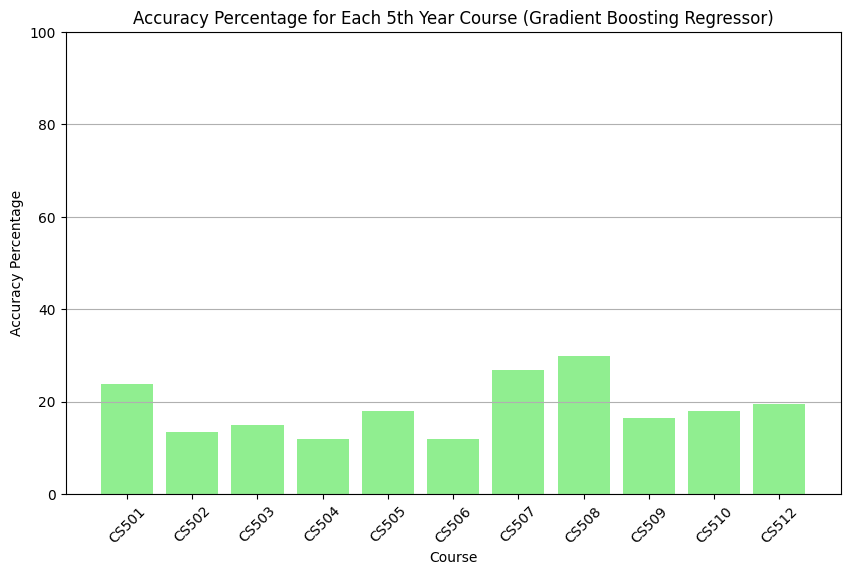

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Convert y_train and y_test back to DataFrames
y_train_df = pd.DataFrame(y_train, columns=target_courses)
y_test_df = pd.DataFrame(y_test, columns=target_courses)

# Initialize a dictionary to store models for each course
models_gb = {}

# Train a separate model for each course
for course in target_courses:
    # Initialize the Gradient Boosting Regressor model
    model_gb = GradientBoostingRegressor(random_state=200)
    
    # Train the model for the current course
    model_gb.fit(X_train, y_train_df[course])  # Access column by label
    
    # Store the trained model in the dictionary
    models_gb[course] = model_gb

# Make predictions on the testing set for each course
y_pred_gb = np.column_stack([models_gb[course].predict(X_test) for course in target_courses])

# Calculate accuracy percentage for each 5th year course
accuracy_per_course_gb = []
for i, course in enumerate(target_courses):
    correct_predictions_gb = np.sum(np.abs(y_test_df[course] - y_pred_gb[:, i]) <= 1)  
    total_predictions_gb = len(y_test_df)
    accuracy_gb = (correct_predictions_gb / total_predictions_gb) * 100
    accuracy_per_course_gb.append(accuracy_gb)

# Visualize accuracy percentage for each 5th year course using Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
plt.bar(target_courses, accuracy_per_course_gb, color='lightgreen')
plt.title('Accuracy Percentage for Each 5th Year Course (Gradient Boosting Regressor)')
plt.xlabel('Course')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


# MLP

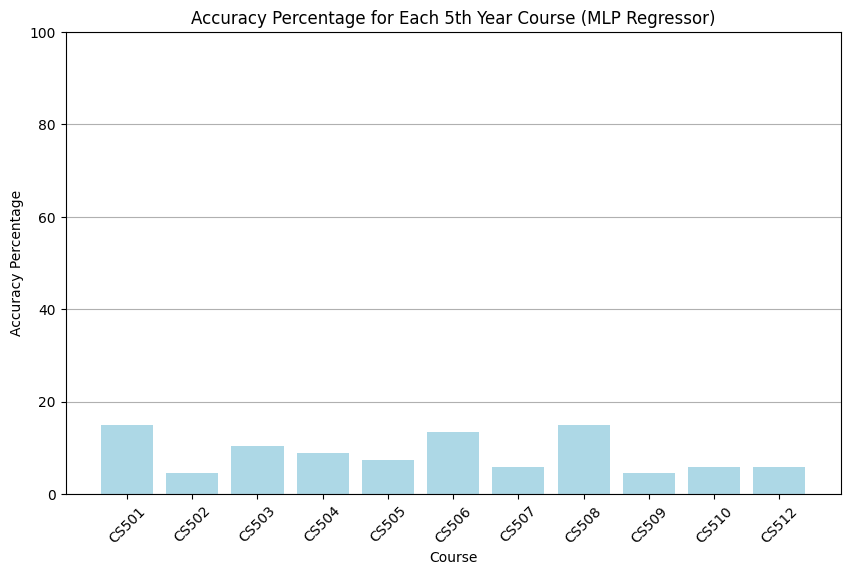

In [18]:
from sklearn.neural_network import MLPRegressor

# Initialize a dictionary to store models for each course
models_mlp = {}

# Train a separate model for each course
for course in target_courses:
    # Initialize the MLP Regressor model
    model_mlp = MLPRegressor(random_state=90, max_iter=1000000000)  # You can adjust max_iter as needed
    
    # Train the model for the current course
    model_mlp.fit(X_train, y_train_df[course])  # Access column by label
    
    # Store the trained model in the dictionary
    models_mlp[course] = model_mlp

# Make predictions on the testing set for each course
y_pred_mlp = np.column_stack([models_mlp[course].predict(X_test) for course in target_courses])

# Calculate accuracy percentage for each 5th year course
accuracy_per_course_mlp = []
for i, course in enumerate(target_courses):
    correct_predictions_mlp = np.sum(np.abs(y_test_df[course] - y_pred_mlp[:, i]) <= 1)  
    total_predictions_mlp = len(y_test_df)
    accuracy_mlp = (correct_predictions_mlp / total_predictions_mlp) * 100
    accuracy_per_course_mlp.append(accuracy_mlp)

# Visualize accuracy percentage for each 5th year course using MLP Regressor
plt.figure(figsize=(10, 6))
plt.bar(target_courses, accuracy_per_course_mlp, color='lightblue')
plt.title('Accuracy Percentage for Each 5th Year Course (MLP Regressor)')
plt.xlabel('Course')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


# More Complex MLP

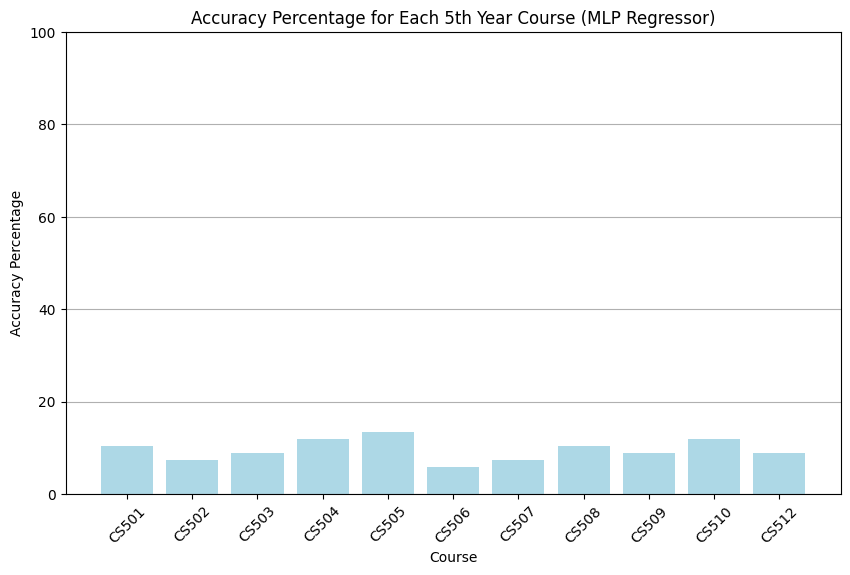

In [19]:
from sklearn.neural_network import MLPRegressor

# Initialize a dictionary to store models for each course
models_mlp = {}

# Define hyperparameters for the MLPRegressor
hidden_layer_sizes = (100, 50)  # Two hidden layers with 100 and 50 neurons
activation = 'relu'  # Activation function
solver = 'adam'  # Optimizer
alpha = 0.0001  # L2 regularization parameter
learning_rate_init = 0.001  # Initial learning rate
max_iter = 1000000  # Maximum number of iterations

# Train a separate model for each course
for course in target_courses:
    # Initialize the MLP Regressor model
    model_mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                              activation=activation,
                              solver=solver,
                              alpha=alpha,
                              learning_rate_init=learning_rate_init,
                              max_iter=max_iter,
                              random_state=42)
    
    # Train the model for the current course
    model_mlp.fit(X_train, y_train_df[course])  # Access column by label
    
    # Store the trained model in the dictionary
    models_mlp[course] = model_mlp

# Make predictions on the testing set for each course
y_pred_mlp = np.column_stack([models_mlp[course].predict(X_test) for course in target_courses])

# Calculate accuracy percentage for each 5th year course
accuracy_per_course_mlp = []
for i, course in enumerate(target_courses):
    correct_predictions_mlp = np.sum(np.abs(y_test_df[course] - y_pred_mlp[:, i]) <= 1)  
    total_predictions_mlp = len(y_test_df)
    accuracy_mlp = (correct_predictions_mlp / total_predictions_mlp) * 100
    accuracy_per_course_mlp.append(accuracy_mlp)

# Visualize accuracy percentage for each 5th year course using MLP Regressor
plt.figure(figsize=(10, 6))
plt.bar(target_courses, accuracy_per_course_mlp, color='lightblue')
plt.title('Accuracy Percentage for Each 5th Year Course (MLP Regressor)')
plt.xlabel('Course')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


# SVM Regression

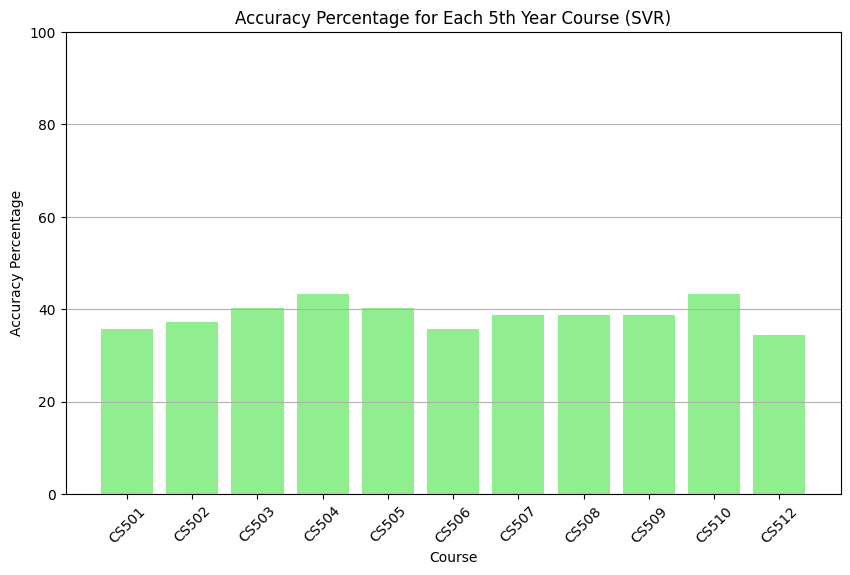

In [20]:
from sklearn.svm import SVR

# Initialize a dictionary to store models for each course
models_svm = {}

# Define hyperparameters for the SVR
kernel = 'rbf'  # Radial Basis Function (RBF) kernel
C = 1000  # Regularization parameter
epsilon = 0.1  # Epsilon parameter
gamma = 'scale'  # Kernel coefficient for 'rbf'

# Train a separate model for each course
for course in target_courses:
    # Initialize the SVR model
    model_svm = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma=gamma)
    
    # Train the model for the current course
    model_svm.fit(X_train, y_train_df[course])  # Access column by label
    
    # Store the trained model in the dictionary
    models_svm[course] = model_svm

# Make predictions on the testing set for each course
y_pred_svm = np.column_stack([models_svm[course].predict(X_test) for course in target_courses])

# Calculate accuracy percentage for each 5th year course
accuracy_per_course_svm = []
for i, course in enumerate(target_courses):
    correct_predictions_svm = np.sum(np.abs(y_test_df[course] - y_pred_svm[:, i]) <= 1)  
    total_predictions_svm = len(y_test_df)
    accuracy_svm = (correct_predictions_svm / total_predictions_svm) * 100
    accuracy_per_course_svm.append(accuracy_svm)

# Visualize accuracy percentage for each 5th year course using SVM
plt.figure(figsize=(10, 6))
plt.bar(target_courses, accuracy_per_course_svm, color='lightgreen')
plt.title('Accuracy Percentage for Each 5th Year Course (SVR)')
plt.xlabel('Course')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


# Improved SVM

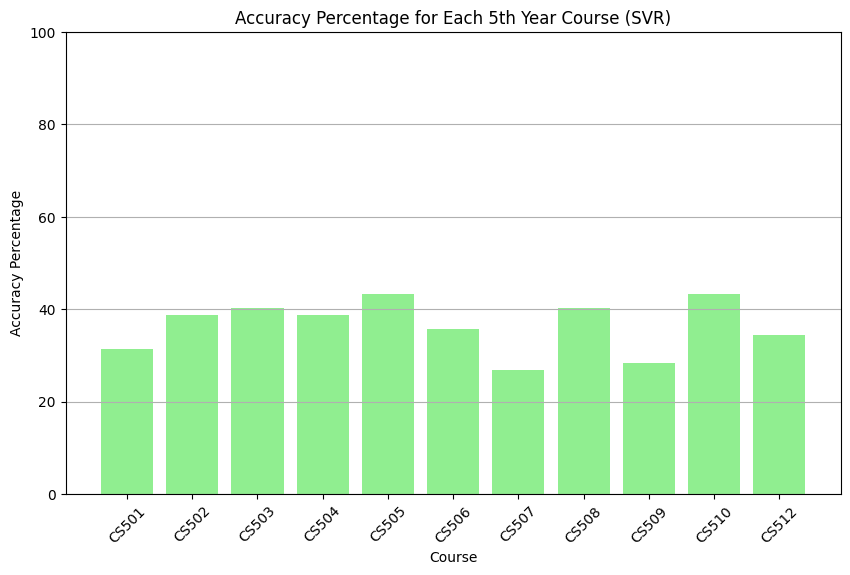

In [21]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a dictionary to store models for each course
models_svm = {}

# Define hyperparameters for the SVR
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}

# Perform grid search and train models for each course
for course in target_courses:
    # Initialize the SVR model
    model_svm = SVR(kernel='rbf')
    
    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(model_svm, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train[:, y.columns.get_loc(course)])  # Fix indexing here
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    
    # Initialize the SVR model with the best hyperparameters
    best_model_svm = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
    
    # Train the model with the best hyperparameters
    best_model_svm.fit(X_train_scaled, y_train[:, y.columns.get_loc(course)])  # Fix indexing here
    
    # Store the trained model in the dictionary
    models_svm[course] = best_model_svm

# Make predictions on the testing set for each course
y_pred_svm = np.column_stack([models_svm[course].predict(X_test_scaled) for course in target_courses])

# Calculate accuracy percentage for each 5th year course
accuracy_per_course_svm = []
for i, course in enumerate(target_courses):
    correct_predictions_svm = np.sum(np.abs(y_test[:, y.columns.get_loc(course)] - y_pred_svm[:, i]) <= 1)  
    total_predictions_svm = len(y_test)
    accuracy_svm = (correct_predictions_svm / total_predictions_svm) * 100
    accuracy_per_course_svm.append(accuracy_svm)

# Visualize accuracy percentage for each 5th year course using SVM
plt.figure(figsize=(10, 6))
plt.bar(target_courses, accuracy_per_course_svm, color='lightgreen')
plt.title('Accuracy Percentage for Each 5th Year Course (SVR)')
plt.xlabel('Course')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


In [22]:
print(y_train.shape)


(268, 11)


In [23]:
# from sklearn.neural_network import MLPRegressor

# # Initialize a dictionary to store models for each course
# models_mlp = {}

# # Define hyperparameters for the MLP
# param_grid_mlp = {
#     'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
#     'activation': ['relu', 'tanh'],
#     'alpha': [0.0001, 0.001, 0.01]
# }

# # Perform grid search and train models for each course
# for course in target_courses:
#     # Initialize the MLP model
#     model_mlp = MLPRegressor(random_state=42, max_iter=1000)
    
#     # Perform grid search to find the best hyperparameters
#     grid_search_mlp = GridSearchCV(model_mlp, param_grid_mlp, cv=5, scoring='neg_mean_squared_error')
#     grid_search_mlp.fit(X_train_scaled, y_train[:, y.columns.get_loc(course)])
    
#     # Get the best hyperparameters
#     best_params_mlp = grid_search_mlp.best_params_
    
#     # Initialize the MLP model with the best hyperparameters
#     best_model_mlp = MLPRegressor(random_state=42, max_iter=1000, **best_params_mlp)
    
#     # Train the model with the best hyperparameters
#     best_model_mlp.fit(X_train_scaled, y_train[:, y.columns.get_loc(course)])
    
#     # Store the trained model in the dictionary
#     models_mlp[course] = best_model_mlp

# # Make predictions on the testing set for each course
# y_pred_mlp = np.column_stack([models_mlp[course].predict(X_test_scaled) for course in target_courses])

# # Calculate accuracy percentage for each 5th year course
# accuracy_per_course_mlp = []
# for i, course in enumerate(target_courses):
#     correct_predictions_mlp = np.sum(np.abs(y_test[:, y.columns.get_loc(course)] - y_pred_mlp[:, i]) <= 1)  
#     total_predictions_mlp = len(y_test)
#     accuracy_mlp = (correct_predictions_mlp / total_predictions_mlp) * 100
#     accuracy_per_course_mlp.append(accuracy_mlp)

# # Visualize accuracy percentage for each 5th year course using MLP
# plt.figure(figsize=(10, 6))
# plt.bar(target_courses, accuracy_per_course_mlp, color='lightblue')
# plt.title('Accuracy Percentage for Each 5th Year Course (MLP)')
# plt.xlabel('Course')
# plt.ylabel('Accuracy Percentage')
# plt.xticks(rotation=45)
# plt.ylim(0, 100)
# plt.grid(axis='y')
# plt.show()


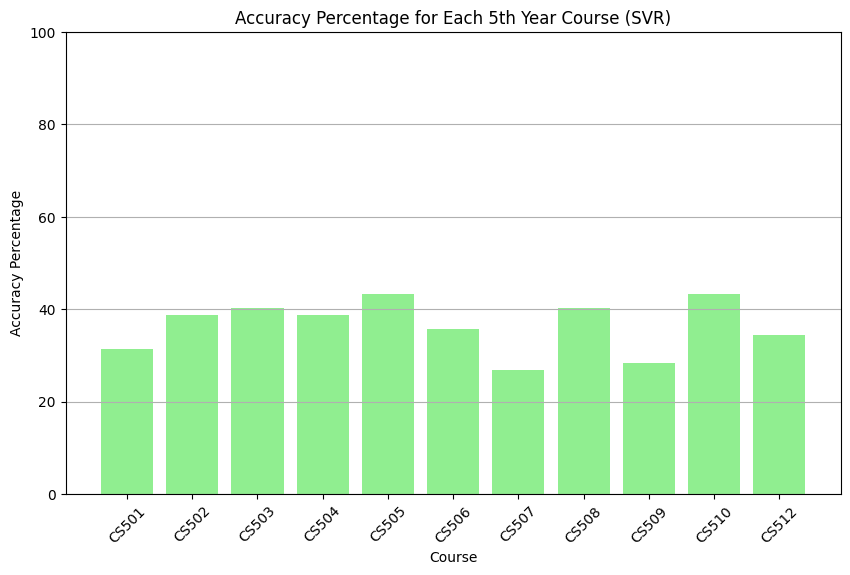

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a dictionary to store models for each course
models_svm = {}

# Define hyperparameters for the SVR
param_grid = {
    'C': [0.1, 1, 10, 100, 1000,1000000],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}

# Define custom hyperparameters for each course
custom_params = {
    'CS101': {'C': 1, 'gamma': 'scale', 'epsilon': 0.1},
    'CS102': {'C': 10, 'gamma': 'auto', 'epsilon': 0.01},
    # Add custom parameters for other courses as needed
}

# Perform grid search and train models for each course
for course in target_courses:
    # Initialize the SVR model
    model_svm = SVR(kernel='rbf')
    
    # If custom parameters are defined for the current course, use them
    if course in custom_params:
        best_params = custom_params[course]
    else:
        # Perform grid search to find the best hyperparameters
        grid_search = GridSearchCV(model_svm, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train[:, y.columns.get_loc(course)])
        best_params = grid_search.best_params_
    
    # Initialize the SVR model with the best hyperparameters
    best_model_svm = SVR(kernel='rbf', **best_params)
    
    # Train the model with the best hyperparameters
    best_model_svm.fit(X_train_scaled, y_train[:, y.columns.get_loc(course)])
    
    # Store the trained model in the dictionary
    models_svm[course] = best_model_svm

# Make predictions on the testing set for each course
y_pred_svm = np.column_stack([models_svm[course].predict(X_test_scaled) for course in target_courses])

# Calculate accuracy percentage for each 5th year course
accuracy_per_course_svm = []
for i, course in enumerate(target_courses):
    correct_predictions_svm = np.sum(np.abs(y_test[:, y.columns.get_loc(course)] - y_pred_svm[:, i]) <= 1)  
    total_predictions_svm = len(y_test)
    accuracy_svm = (correct_predictions_svm / total_predictions_svm) * 100
    accuracy_per_course_svm.append(accuracy_svm)

# Visualize accuracy percentage for each 5th year course using SVM
plt.figure(figsize=(10, 6))
plt.bar(target_courses, accuracy_per_course_svm, color='lightgreen')
plt.title('Accuracy Percentage for Each 5th Year Course (SVR)')
plt.xlabel('Course')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


In [26]:
Query: "List out the companies where Elon Musk is listed as a co-founder along with other people."


Reasoning: '''Let's think step by step in order to produce the enhanced_context. 
We first need to identify the companies where Elon Musk is listed as a co-founder. 
To do this, we can use KG data to find information about Elon Musk's involvement 
in various companies. We can then cross-reference this information with a list of 
companies where he is listed as a co-founder. Once we have this list, we can use 
it to filter out any irrelevant information and focus on the companies that we 
are interested in. This will help us to produce a more accurate and relevant enhanced context.'''

Answer: '''According to KG data, Elon Musk is listed as a co-founder of 
several companies, including SpaceX, Tesla, X Corp., the Boring Company, xAI, 
Neuralink, OpenAI, and the'''


SyntaxError: invalid syntax (3664156685.py, line 1)